In [1]:
# This Project shows the Image Detection for two images named test1.jpg and test2.jpg and also captures the Image and Video and detects 
# the Persons. The outputs are shown accordingly with the code snippets.

In [2]:
!pip install mtcnn
!pip show mtcnn
!pip install -U tensorflow

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: c:\users\dell\anaconda3\lib\site-packages
Requires: keras, opencv-python
Required-by: 


In [3]:
!pip3 install numpy --upgrade

from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
import cv2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.1 which is incompatible.


     ---------------------------------------- 15.8/15.8 MB 1.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [4]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [5]:
# load image from fil
filename = 'test1.jpg'
pixels = pyplot.imread(filename)

In [6]:
# create the detector, using default weights
detector = MTCNN()

In [7]:
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

1/1 [==============================] - 0s 231ms/step
{'box': [373, 83, 100, 129], 'confidence': 0.9998095631599426, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 171), 'mouth_right': (438, 177)}}
{'box': [185, 68, 91, 118], 'confidence': 0.9993304014205933, 'keypoints': {'left_eye': (208, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


In [8]:
def draw_image_with_boxes(filename, result_list):
# load the image
    data = pyplot.imread(filename)
# plot the image
    pyplot.imshow(data)
# get the context for drawing boxes
#gca-get current axis
    ax = pyplot.gca()
# plot each box
    for result in result_list:
# get coordinates
        x, y, width, height = result['box']
# create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
        ax.add_patch(rect)
# show the plot
    pyplot.show()

In [9]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

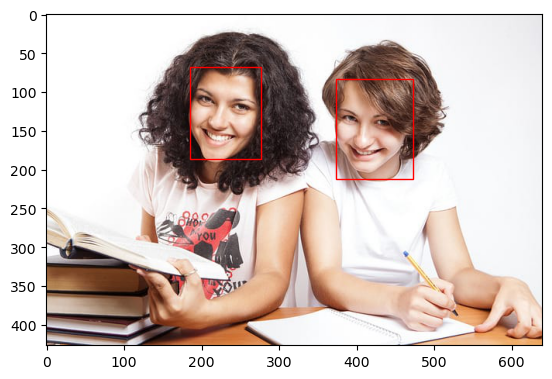

In [10]:
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [11]:
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

3/3 [==============================] - 0s 27ms/step


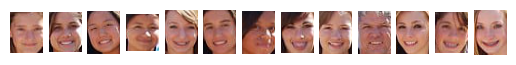

In [12]:
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

1/1 [==============================] - 0s 42ms/step


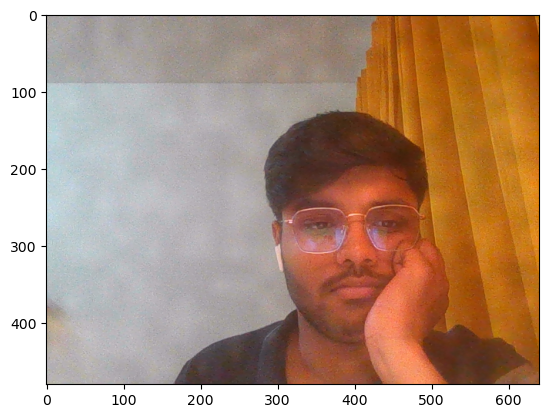

In [13]:
cap = cv2.VideoCapture(0)
ret, data = cap.read()
faces = detector.detect_faces(data)
result_list=faces
rgb = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
# plot the image
pyplot.imshow(rgb)
# get the context for drawing boxes
ax = pyplot.gca()
# plot each box
for result in result_list:
# get coordinates
    x, y, width, height = result['box']
# create the shape
    rect = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
    ax.add_patch(rect)
# show the plot
pyplot.show()
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 48ms/step


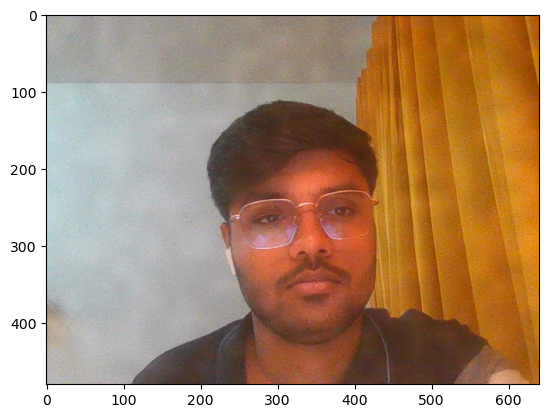

1/1 [==============================] - 0s 30ms/step


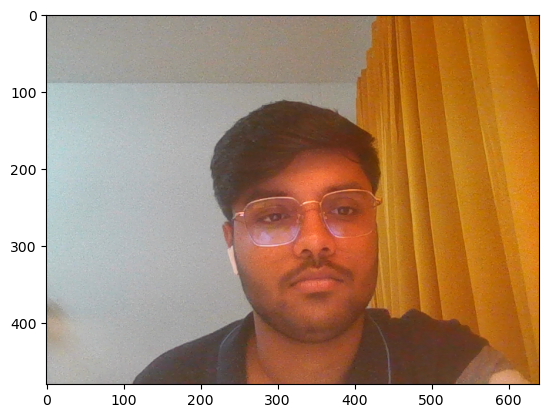

1/1 [==============================] - 0s 37ms/step


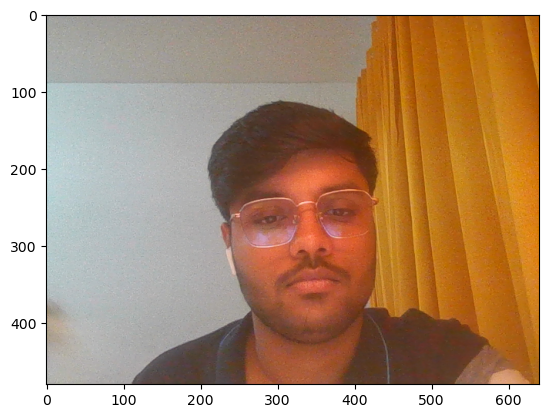

1/1 [==============================] - 0s 30ms/step


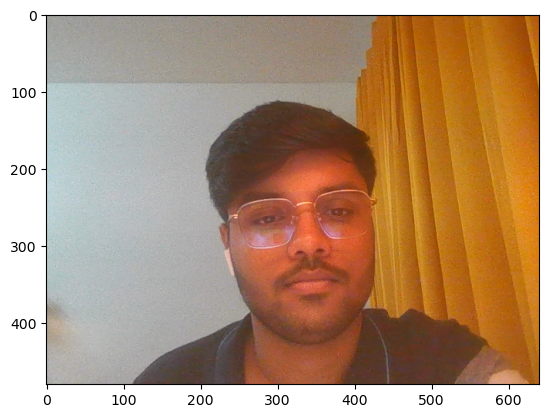

1/1 [==============================] - 0s 43ms/step


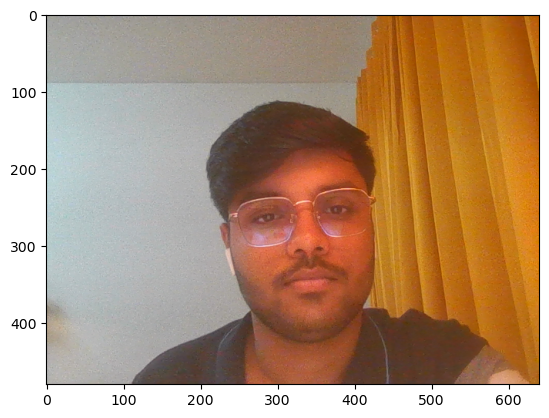

1/1 [==============================] - 0s 45ms/step


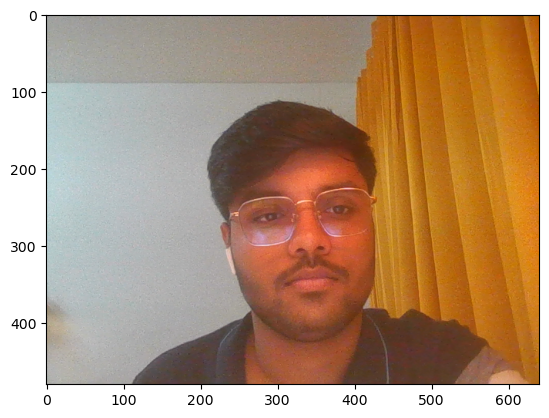

1/1 [==============================] - 0s 54ms/step


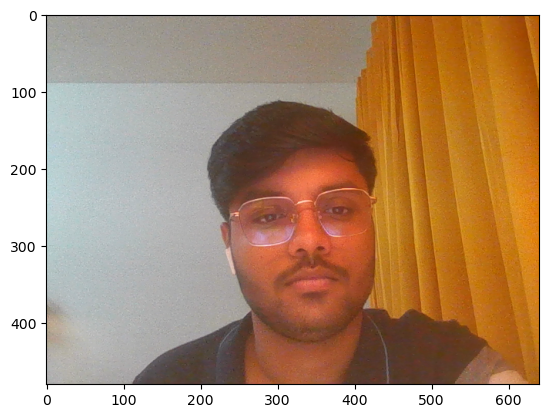

1/1 [==============================] - 0s 40ms/step


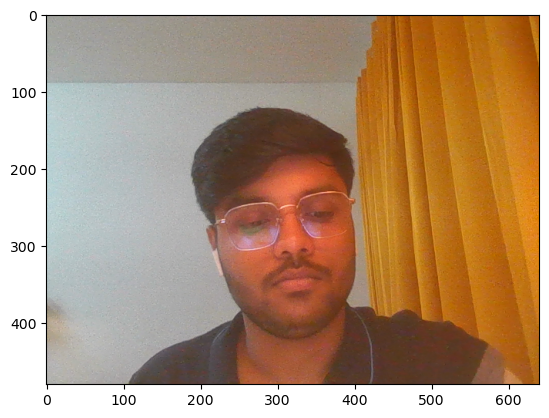

1/1 [==============================] - 0s 34ms/step


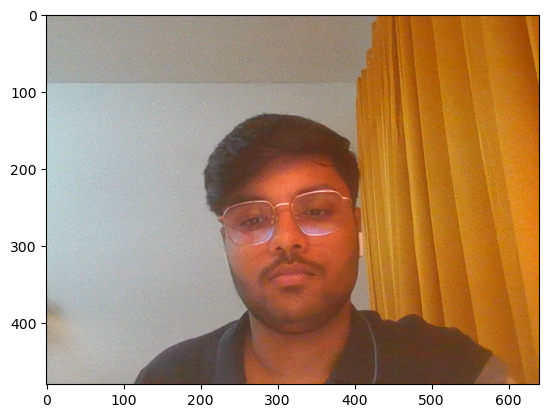

1/1 [==============================] - 0s 31ms/step


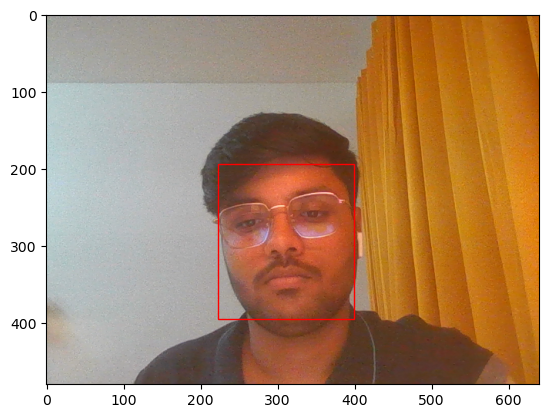

1/1 [==============================] - 0s 24ms/step


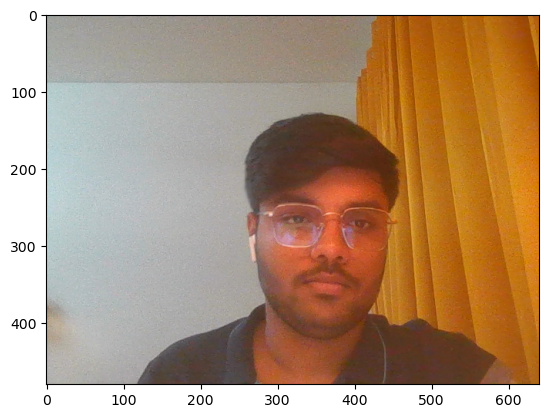

1/1 [==============================] - 0s 25ms/step


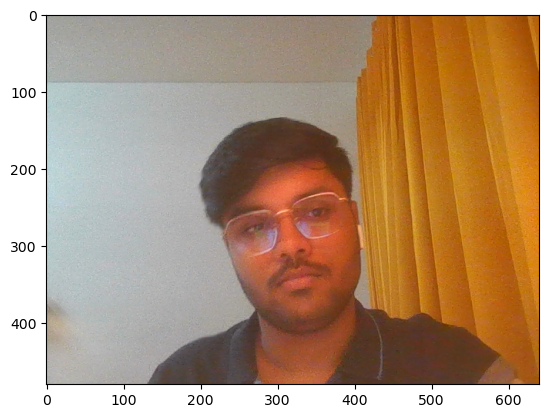

1/1 [==============================] - 0s 24ms/step


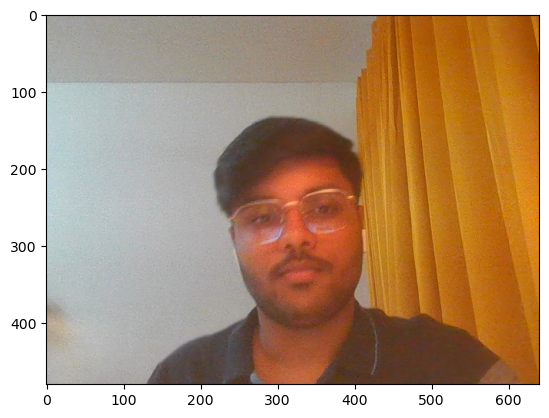

1/1 [==============================] - 0s 28ms/step


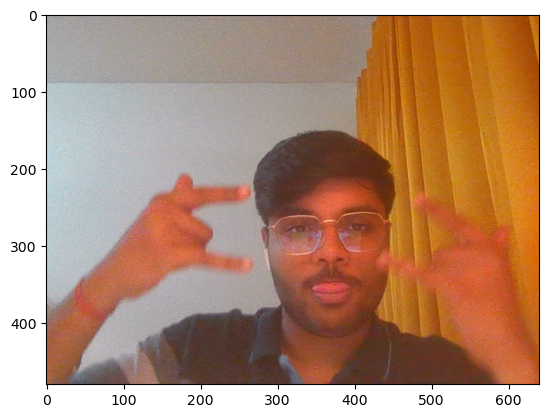

1/1 [==============================] - 0s 32ms/step


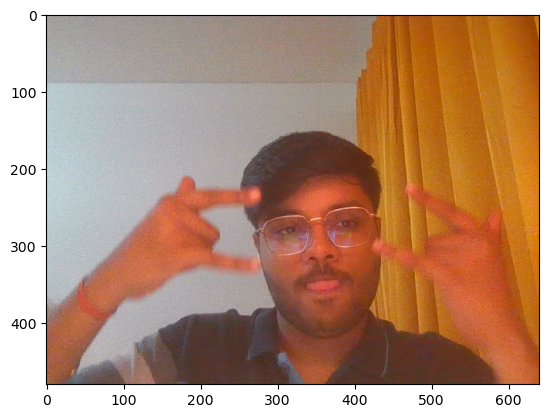

1/1 [==============================] - 0s 41ms/step


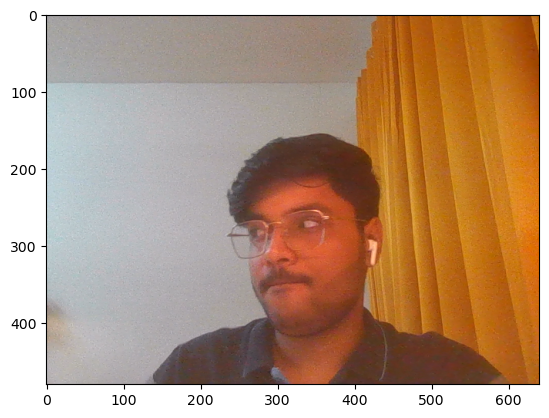

1/1 [==============================] - 0s 83ms/step


In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, data = cap.read()
    faces = detector.detect_faces(data)
    result_list=faces
    rgb = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    pyplot.imshow(rgb)
    ax = pyplot.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    pyplot.show()
    cv2.imshow('OpenCV Feed',data)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
video_capture = cv2.VideoCapture(0) 
while (True):
    ret, frame = video_capture.read()
    frame = cv2.resize(frame, (600, 400))
    boxes = detector.detect_faces(frame)
    if boxes:
 
        box = boxes[0]['box']
        conf = boxes[0]['confidence']
        x, y, w, h = box[0], box[1], box[2], box[3]
 
        if conf > 0.5:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    cv2.imshow("Frame", frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
 
video_capture.release()
cv2.destroyAllWindows()